In [1]:
import pandas as pd
import numpy as num

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('amazonreviews_oneplus.xlsx')
df

,S. No,stars,body,name,title
0,0,1.0 out of 5 stars,Bakwas phone,vikas,Bakwas phone
1,1,1.0 out of 5 stars,It is like a normal android..not an OnePlus..L...,Verified buyer,It is not OnePlus
2,2,5.0 out of 5 stars,The best part of the phone is it's super simpl...,Rohit M,Good overall
3,3,5.0 out of 5 stars,Performance is really good - no lags at allPer...,Subhrajit Pyne,Smooth user experience
4,4,1.0 out of 5 stars,Phone looks good but features are 10k phoneCam...,Omar khan,Worst phone in this segment
...,...,...,...,...,...
485,485,1.0 out of 5 stars,Gets heated quickly. Charge is not sufficient ...,Balaji,Oneplus is not upto the mark
486,486,5.0 out of 5 stars,"Everything is good, Camera is pretty decent an...",Kanakavardhan Reddy,One+...is too good 😊
487,487,1.0 out of 5 stars,Don't go with the name. It's an ordinary andro...,mani,Fooling with name One plus
488,488,5.0 out of 5 stars,Wonderful is the only word I've for this phone,SRINIVAS VITTHAL PANDURANGI,What an excellent mobile


In [4]:
cust_name = df['name'] 
review_title = df['title']
rate = df['stars']
review_content = df['body']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S. No   490 non-null    int64 
 1   stars   490 non-null    object
 2   body    487 non-null    object
 3   name    489 non-null    object
 4   title   489 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.3+ KB


In [7]:
df['stars'].value_counts(normalize=True)*100

5.0 out of 5 stars    36.326531
1.0 out of 5 stars    24.693878
4.0 out of 5 stars    16.938776
3.0 out of 5 stars    13.061224
2.0 out of 5 stars     8.979592
Name: stars, dtype: float64

In [8]:
ratings=df.groupby(['stars']).count()
ratings

,S. No,body,name,title
stars,,,,
1.0 out of 5 stars,121,121,120,120
2.0 out of 5 stars,44,44,44,44
3.0 out of 5 stars,64,64,64,64
4.0 out of 5 stars,83,83,83,83
5.0 out of 5 stars,178,175,178,178


Text(0, 0.5, 'Count')

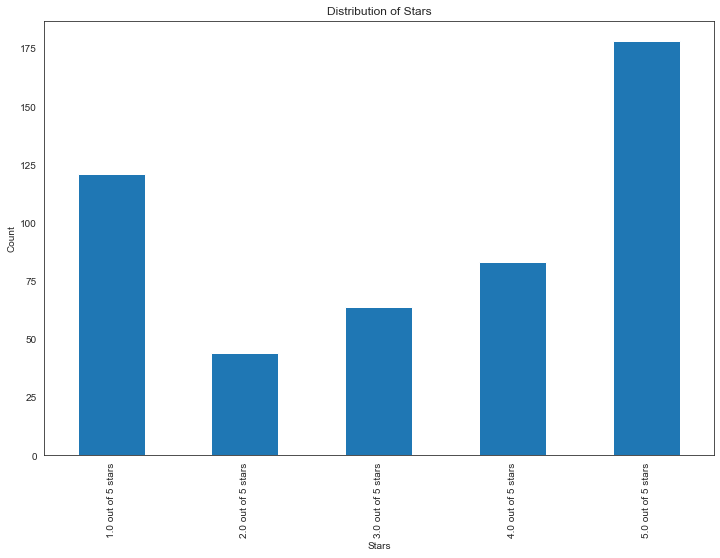

In [9]:
plt.figure(figsize=(12,8))
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')

In [10]:
review_content

0                                           Bakwas phone
1      It is like a normal android..not an OnePlus..L...
2      The best part of the phone is it's super simpl...
3      Performance is really good - no lags at allPer...
4      Phone looks good but features are 10k phoneCam...
                             ...                        
485    Gets heated quickly. Charge is not sufficient ...
486    Everything is good, Camera is pretty decent an...
487    Don't go with the name. It's an ordinary andro...
488       Wonderful is the only word I've for this phone
489    Does not deserve a single star. Battery draini...
Name: body, Length: 490, dtype: object

In [11]:
Reviews=df.iloc[:,[1]]
Reviews

,stars
0,1.0 out of 5 stars
1,1.0 out of 5 stars
2,5.0 out of 5 stars
3,5.0 out of 5 stars
4,1.0 out of 5 stars
...,...
485,1.0 out of 5 stars
486,5.0 out of 5 stars
487,1.0 out of 5 stars
488,5.0 out of 5 stars


In [12]:
Reviews.shape

(490, 1)

In [13]:
Reviews.describe()

,stars
count,490
unique,5
top,5.0 out of 5 stars
freq,178


In [14]:
# removing customer name and reviw title column as they have not that significance in output##
df.drop(["name","title"],axis=1,inplace=True)
df.head()

,S. No,stars,body
0,0,1.0 out of 5 stars,Bakwas phone
1,1,1.0 out of 5 stars,It is like a normal android..not an OnePlus..L...
2,2,5.0 out of 5 stars,The best part of the phone is it's super simpl...
3,3,5.0 out of 5 stars,Performance is really good - no lags at allPer...
4,4,1.0 out of 5 stars,Phone looks good but features are 10k phoneCam...


In [15]:
df.body.isna().sum()

3

In [16]:
df['body']=df['body'].fillna(" ")

In [17]:
df.body.isna().sum()

0

In [18]:
##Converting all review into Lowercase..###

df['body']= df['body'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [19]:
## removing punctuation from review..#
import string
df['body']=df['body'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [20]:
## Remove Numbers from review...##
df['body']=df['body'].str.replace('[0-9]','')

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df['body']=df['body'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [25]:
df.head(5)

,S. No,stars,body
0,0,1.0 out of 5 stars,bakwas phone
1,1,1.0 out of 5 stars,like normal androidnot onepluslow processing e...
2,2,5.0 out of 5 stars,best part phone super simple user friendly ope...
3,3,5.0 out of 5 stars,performance really good lags allperfectly smoo...
4,4,1.0 out of 5 stars,phone looks good features k phonecamera worstp...


In [26]:
def polarity(stars): 
    # set sentiment 
    if df['stars'] > 3: 
        return 'positive'
    elif df['stars'] < 0: 
        return 'negative'
    else: 
        return 'neutral'
    
def polarity(stars):
    return pd.DataFrame(polarity(stars),polarity_Rating)

In [27]:
df.body = df.body.astype(str)

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentialz = SentimentIntensityAnalyzer()

In [29]:
sentialz.polarity_scores(df.body.iloc[2])

{'neg': 0.082, 'neu': 0.496, 'pos': 0.422, 'compound': 0.9678}

In [30]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sentialz.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'
    
def get_sentiment(review):
    return pd.Series([sentialz.polarity_scores(review),get_senti_class(review)])

In [31]:
#Applying function to all tweets
df[["Scores", "Sentiment"]] = df.body.apply(get_sentiment)
df

,S. No,stars,body,Scores,Sentiment
0,0,1.0 out of 5 stars,bakwas phone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,1,1.0 out of 5 stars,like normal androidnot onepluslow processing e...,"{'neg': 0.19, 'neu': 0.724, 'pos': 0.086, 'com...",negative
2,2,5.0 out of 5 stars,best part phone super simple user friendly ope...,"{'neg': 0.082, 'neu': 0.496, 'pos': 0.422, 'co...",positive
3,3,5.0 out of 5 stars,performance really good lags allperfectly smoo...,"{'neg': 0.036, 'neu': 0.646, 'pos': 0.319, 'co...",positive
4,4,1.0 out of 5 stars,phone looks good features k phonecamera worstp...,"{'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'comp...",positive
...,...,...,...,...,...
485,485,1.0 out of 5 stars,gets heated quickly charge sufficient day wort...,"{'neg': 0.221, 'neu': 0.643, 'pos': 0.136, 'co...",negative
486,486,5.0 out of 5 stars,everything good camera pretty decent battery l...,"{'neg': 0.0, 'neu': 0.509, 'pos': 0.491, 'comp...",positive
487,487,1.0 out of 5 stars,dont go name ordinary android phone k dont spe...,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...",negative
488,488,5.0 out of 5 stars,wonderful word ive phone,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",positive


In [32]:
df.Sentiment.value_counts()

positive    354
negative    108
neutral      28
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

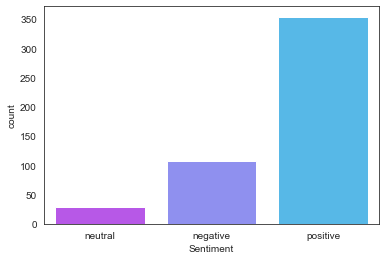

In [33]:
sns.countplot(df.Sentiment,palette='cool_r')

In [34]:
df['compound']=df['Scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score']=''
df.loc[df.compound>0,'comp_score']='positive'
df.loc[df.compound==0,'comp_score']='neutral'
df.loc[df.compound<0,'comp_score']='negative'
df.head(30)

,S. No,stars,body,Scores,Sentiment,compound,comp_score
0,0,1.0 out of 5 stars,bakwas phone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.0000,neutral
1,1,1.0 out of 5 stars,like normal androidnot onepluslow processing e...,"{'neg': 0.19, 'neu': 0.724, 'pos': 0.086, 'com...",negative,-0.4588,negative
2,2,5.0 out of 5 stars,best part phone super simple user friendly ope...,"{'neg': 0.082, 'neu': 0.496, 'pos': 0.422, 'co...",positive,0.9678,positive
3,3,5.0 out of 5 stars,performance really good lags allperfectly smoo...,"{'neg': 0.036, 'neu': 0.646, 'pos': 0.319, 'co...",positive,0.9678,positive
4,4,1.0 out of 5 stars,phone looks good features k phonecamera worstp...,"{'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'comp...",positive,0.7845,positive
5,5,5.0 out of 5 stars,first impression overwhelming major upgrade la...,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",positive,0.9349,positive
6,6,5.0 out of 5 stars,awesome phone amazing camera better nord black...,"{'neg': 0.0, 'neu': 0.375, 'pos': 0.625, 'comp...",positive,0.9432,positive
7,7,5.0 out of 5 stars,awesome phone pricecamera features good previo...,"{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'comp...",positive,0.8531,positive
8,8,5.0 out of 5 stars,far good omission alert slider baffling everyt...,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",positive,0.9571,positive
9,9,5.0 out of 5 stars,great phone,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",positive,0.6249,positive


In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [36]:
le=preprocessing.LabelEncoder()

In [37]:
df['comp_score']=le.fit_transform(df['comp_score'])

<AxesSubplot:xlabel='stars', ylabel='count'>

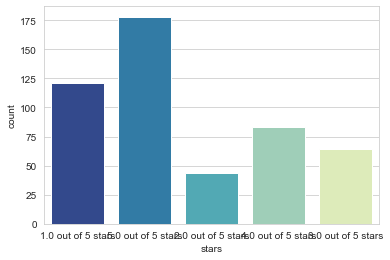

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='stars',data=df,palette='YlGnBu_r')

In [39]:
x=df['body']
y=df['comp_score']

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((367,), (123,), (367,), (123,))

# BOW

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer().fit(X_train)

In [43]:
vect.get_feature_names()[::100]

['aata',
 'apply',
 'behind',
 'buttons',
 'cheep',
 'core',
 'diagonally',
 'edgesso',
 'fact',
 'friends',
 'gui',
 'hrsday',
 'jackcase',
 'lil',
 'meadia',
 'multitasking',
 'okayprocessor',
 'par',
 'plastic',
 'promoters',
 'recognise',
 'sales',
 'slight',
 'sturdy',
 'thinking',
 'unless',
 'warp',
 'youthe']

In [44]:
len(vect.get_feature_names())

2719

In [45]:
X_train_vectorized=vect.transform(X_train)
X_train_vectorized

<367x2719 sparse matrix of type '<class 'numpy.int64'>'
	with 9369 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='ovr',solver='liblinear')
model.fit(X_train_vectorized,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [47]:
from sklearn.metrics import accuracy_score
predictions=model.predict(vect.transform(X_test))
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.7804878048780488


In [48]:
#smallest coefs are words in neagative reviews and largest coefs are words in positive reviews

In [49]:
feature_names=np.array(vect.get_feature_names())
sorted_coef_index=model.coef_[0].argsort()
print('Smallest coefs:\n{}'.format(feature_names[sorted_coef_index[:10]]))
print('Largest coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest coefs:
['good' 'best' 'great' 'excellent' 'experience' 'support' 'samsung'
 'worth' 'please' 'superb']
Largest coefs:
['worst' 'disappointed' 'bad' 'disappointing' 'poor' 'killer' 'waste'
 'low' 'pathetic' 'problem']


# Tf-idf

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(min_df=2).fit(X_train)
len(vect.get_feature_names())

987

In [51]:
#featured with high tfidf are highly used in particular review

In [52]:
X_train_vectorized=vect.transform(X_train)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_vectorized,y_train)

LogisticRegression()

In [53]:
from sklearn.metrics import accuracy_score
predictions=model.predict(vect.transform(X_test))
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.7398373983739838


In [54]:
feature_names=np.array(vect.get_feature_names())
sorted_coef_index=model.coef_[0].argsort()
print('Smallest coefs:\n{}'.format(feature_names[sorted_coef_index[:10]]))
print('Largest coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest coefs:
['good' 'best' 'great' 'excellent' 'superb' 'support' 'nice' 'screen'
 'weight' 'worth']
Largest coefs:
['worst' 'waste' 'bad' 'poor' 'disappointed' 'disappointing' 'oneplus'
 'killer' 'return' 'pathetic']


# n-grams

In [55]:
vect=CountVectorizer(min_df=2, ngram_range=(1,2)).fit(X_train)
X_train_vectorized=vect.transform(X_train)
len(vect.get_feature_names())

1712

In [56]:
model=LogisticRegression()
model.fit(X_train_vectorized,y_train)

LogisticRegression()

In [57]:
from sklearn.metrics import accuracy_score
predictions=model.predict(vect.transform(X_test))
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.7642276422764228


In [58]:
feature_names=np.array(vect.get_feature_names())
sorted_coef_index=model.coef_[0].argsort()
print('Smallest coefs:\n{}'.format(feature_names[sorted_coef_index[:10]]))
print('Largest coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest coefs:
['best' 'good' 'experience' 'ok' 'excellent' 'great' 'samsung' 'please'
 'processor' 'superb']
Largest coefs:
['disappointed' 'waste' 'disappointing' 'bad' 'worst' 'poor' 'killer'
 'little' 'problem' 'pathetic']
